<a href="https://colab.research.google.com/github/69421/mbacke2801/blob/main/Lab_19_Stacked_Charts_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [1]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-06-05 19:04:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M   107MB/s    in 1.4s    

2025-06-05 19:04:43 (107 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [19]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [20]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



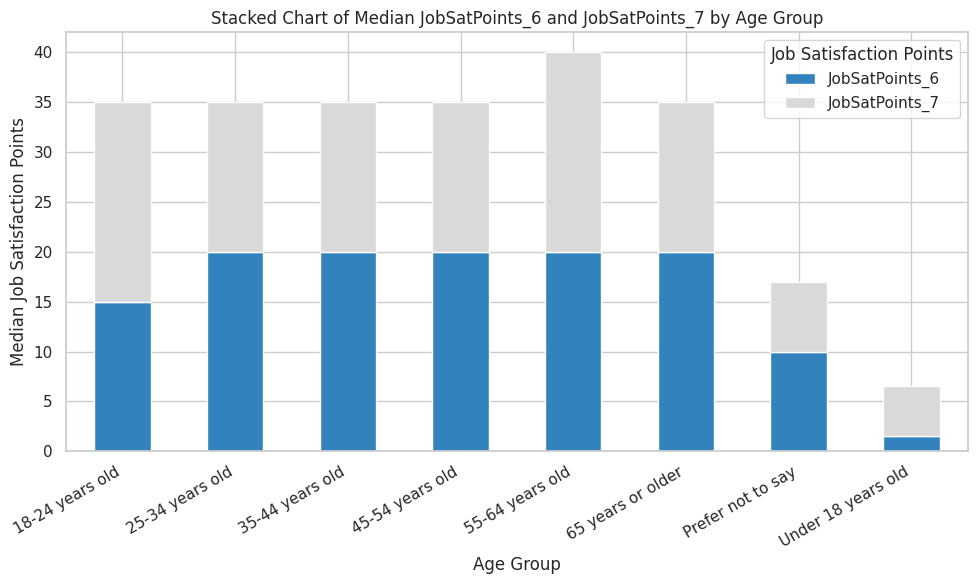

In [30]:
# Sélectionner les groupes d'âge les plus fréquents pour la lisibilité
top_ages = df['Age'].value_counts().head(8).index
filtered = df[df['Age'].isin(top_ages)]

# Calculer la médiane des scores de satisfaction par groupe d'âge
job_sat_by_age = filtered.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Trier les groupes d'âge pour un affichage logique (optionnel)
job_sat_by_age = job_sat_by_age.reindex(sorted(job_sat_by_age.index), fill_value=0)

# Tracer le graphique empilé
job_sat_by_age.plot(kind='bar', stacked=True, figsize=(10,6), colormap='tab20c')
plt.title('Stacked Chart of Median JobSatPoints_6 and JobSatPoints_7 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Job Satisfaction Points')
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


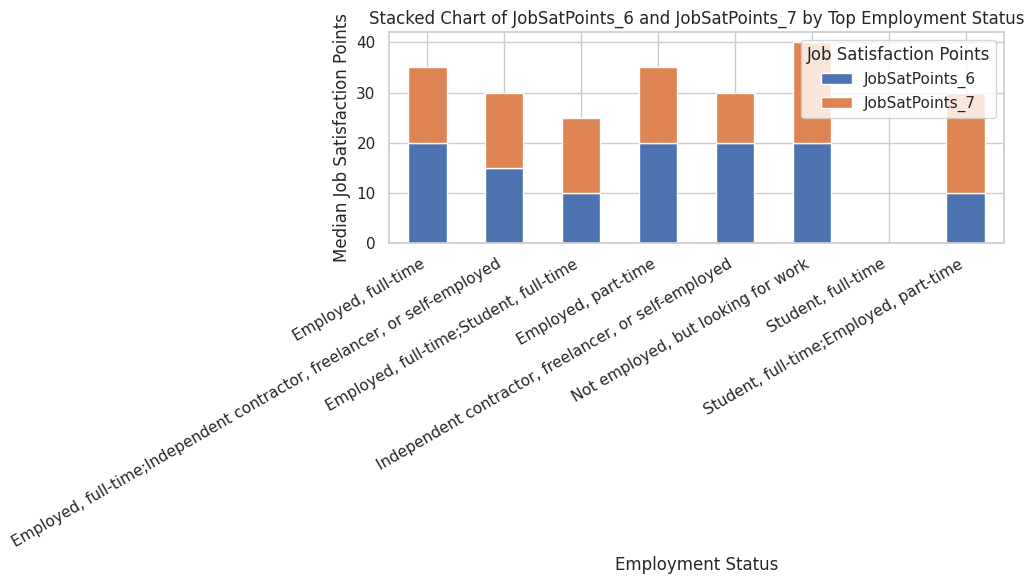

In [29]:
# Garder les 8 types d'emploi les plus fréquents
top_employment = df['Employment'].value_counts().head(8).index
filtered = df[df['Employment'].isin(top_employment)]

job_sat_by_employment = filtered.groupby('Employment')[['JobSatPoints_6', 'JobSatPoints_7']].median()

job_sat_by_employment.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Stacked Chart of JobSatPoints_6 and JobSatPoints_7 by Top Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Job Satisfaction Points')
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


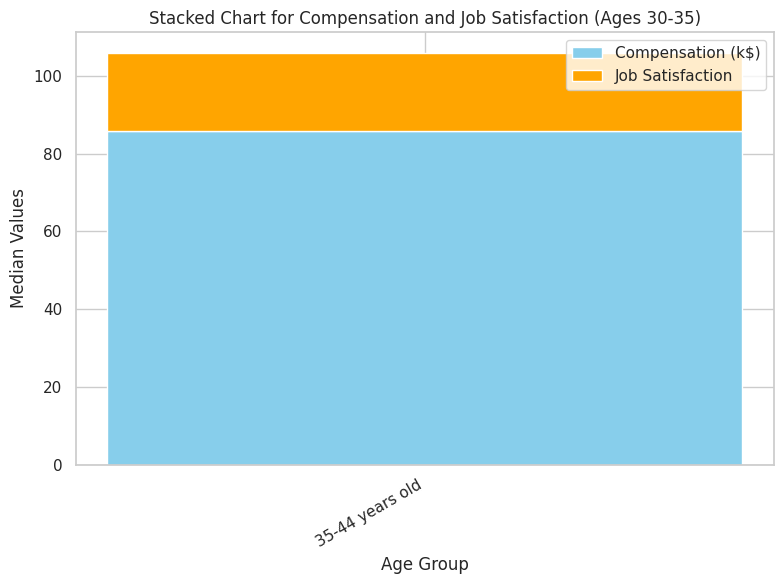

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Afficher les valeurs uniques pour ajuster le filtre
print(df['Age'].unique())

# Filtrer dynamiquement les tranches contenant "30" ou "35"
age_range = [age for age in df['Age'].unique() if ("30" in str(age)) or ("35" in str(age))]
filtered = df[df['Age'].isin(age_range)]

# Nettoyer : enlever les valeurs manquantes
df_age_clean = filtered.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Calculer la médiane par tranche d’âge
grouped = df_age_clean.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median().reset_index()

# Trier pour l'affichage logique
grouped = grouped.sort_values('Age')

# Préparer le plot empilé
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.5
indices = np.arange(len(grouped))

compensation = grouped['ConvertedCompYearly'] / 1000  # en milliers
job_satisfaction = grouped['JobSatPoints_6']

# Barres empilées
ax.bar(indices, compensation, bar_width, label='Compensation (k$)', color='skyblue')
ax.bar(indices, job_satisfaction, bar_width, bottom=compensation, label='Job Satisfaction', color='orange')

ax.set_xlabel('Age Group')
ax.set_ylabel('Median Values')
ax.set_title('Stacked Chart for Compensation and Job Satisfaction (Ages 30-35)')
ax.set_xticks(indices)
ax.set_xticklabels(grouped['Age'], rotation=30, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


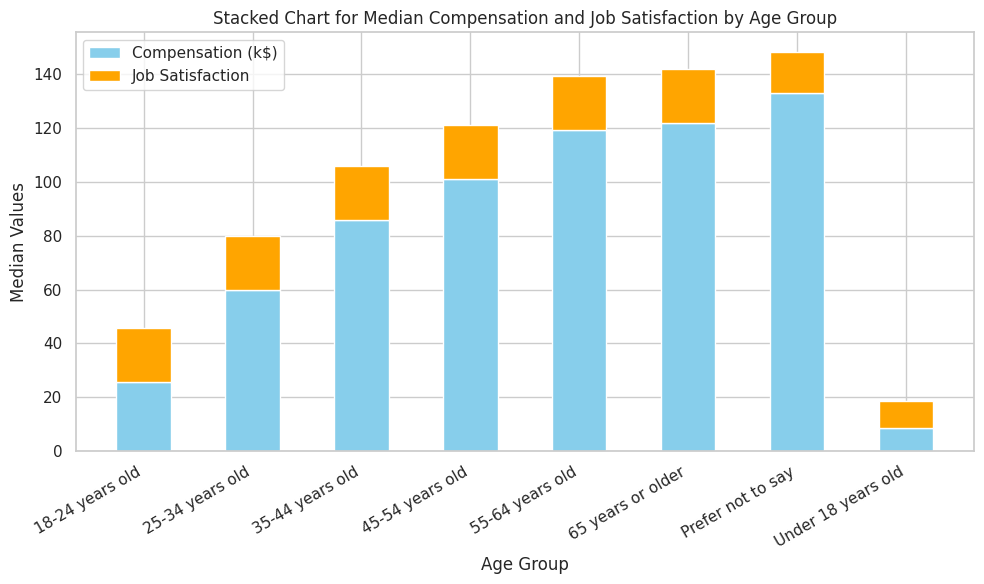

In [33]:
##Write your code here
# ...existing code...

# Nettoyer : enlever les valeurs manquantes pour les deux colonnes
df_age_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

# Calculer la médiane par tranche d’âge
grouped = df_age_clean.groupby('Age')[['ConvertedCompYearly', 'JobSatPoints_6']].median().reset_index()

# Trier pour l'affichage logique
grouped = grouped.sort_values('Age')

# Préparer le plot empilé
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.5
indices = np.arange(len(grouped))

compensation = grouped['ConvertedCompYearly'] / 1000  # en milliers
job_satisfaction = grouped['JobSatPoints_6']

# Barres empilées
ax.bar(indices, compensation, bar_width, label='Compensation (k$)', color='skyblue')
ax.bar(indices, job_satisfaction, bar_width, bottom=compensation, label='Job Satisfaction', color='orange')

ax.set_xlabel('Age Group')
ax.set_ylabel('Median Values')
ax.set_title('Stacked Chart for Median Compensation and Job Satisfaction by Age Group')
ax.set_xticks(indices)
ax.set_xticklabels(grouped['Age'], rotation=30, ha='right')
ax.legend()

plt.tight_layout()
plt.show()
# ...existing code...

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


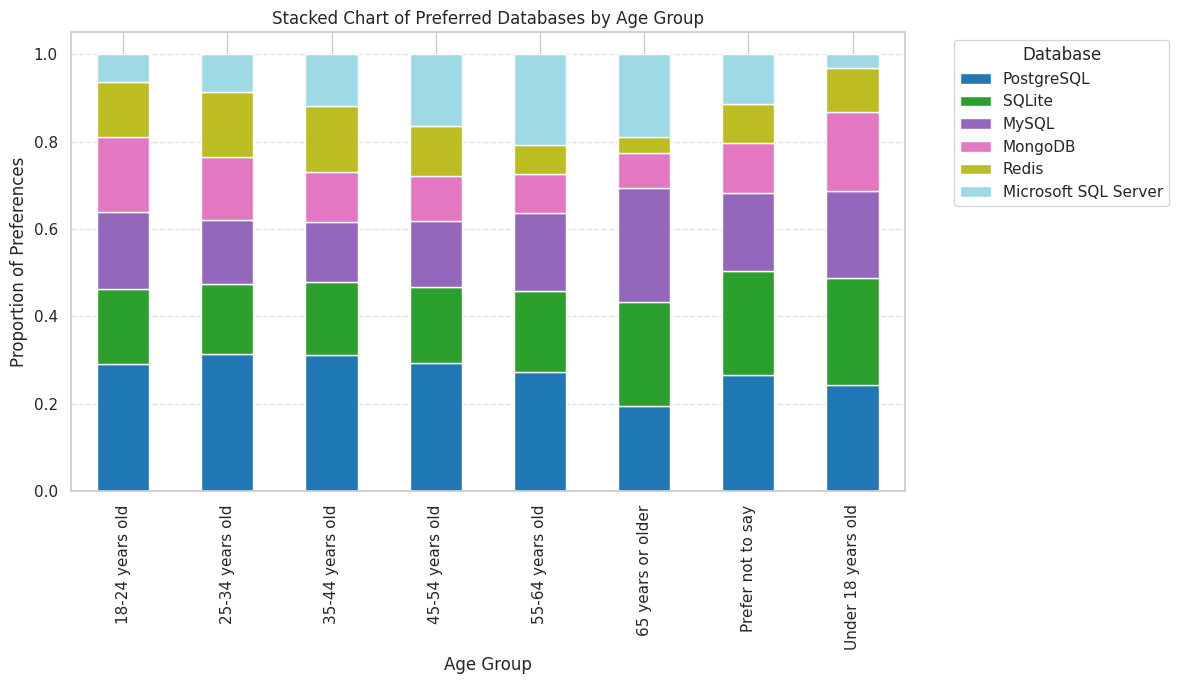

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1 : Nettoyer
df_clean = df.dropna(subset=['DatabaseWantToWorkWith', 'Age'])

# Étape 2 : Normaliser (exploser les lignes avec plusieurs bases séparées par ;)
df_exploded = df_clean.assign(DatabaseList=df_clean['DatabaseWantToWorkWith'].str.split(';')).explode('DatabaseList')

# Étape 3 : Grouper par Age et Database
age_db_counts = df_exploded.groupby(['Age', 'DatabaseList']).size().unstack(fill_value=0)

# Optionnel : ne garder que les top 6 bases les plus fréquentes
top_dbs = df_exploded['DatabaseList'].value_counts().head(6).index
age_db_counts = age_db_counts[top_dbs]

# Étape 4 : Convertir en proportions (pour chaque tranche d'âge)
age_db_props = age_db_counts.div(age_db_counts.sum(axis=1), axis=0)

# Étape 5 : Tracer le graphique empilé
age_db_props.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Stacked Chart of Preferred Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Preferences')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


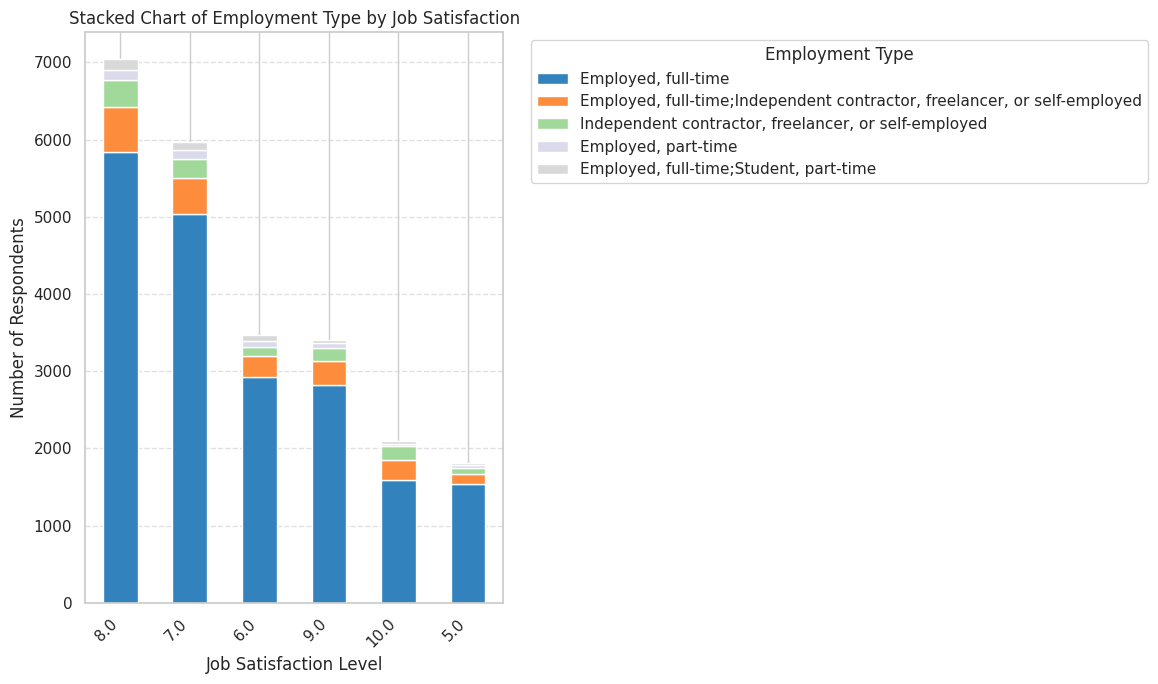

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1 : Nettoyage
df_clean = df.dropna(subset=['Employment', 'JobSat'])

# Étape 2 : Regrouper les catégories de JobSat longues
# Exemple : limiter à 6 niveaux les plus fréquents
top_job_sat = df_clean['JobSat'].value_counts().head(6).index
df_clean = df_clean[df_clean['JobSat'].isin(top_job_sat)]

# Étape 3 : Table croisée des effectifs
pivot_table = pd.crosstab(df_clean['JobSat'], df_clean['Employment'])

# Étape 4 : Garder top 5 types d’emploi
top_employment_types = df_clean['Employment'].value_counts().head(5).index
pivot_table = pivot_table[top_employment_types]

# Étape 5 : Tri des niveaux de satisfaction (optionnel)
pivot_table = pivot_table.reindex(index=top_job_sat)

# Étape 6 : Graphique empilé
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20c')

# Mise en forme
plt.title('Stacked Chart of Employment Type by Job Satisfaction')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


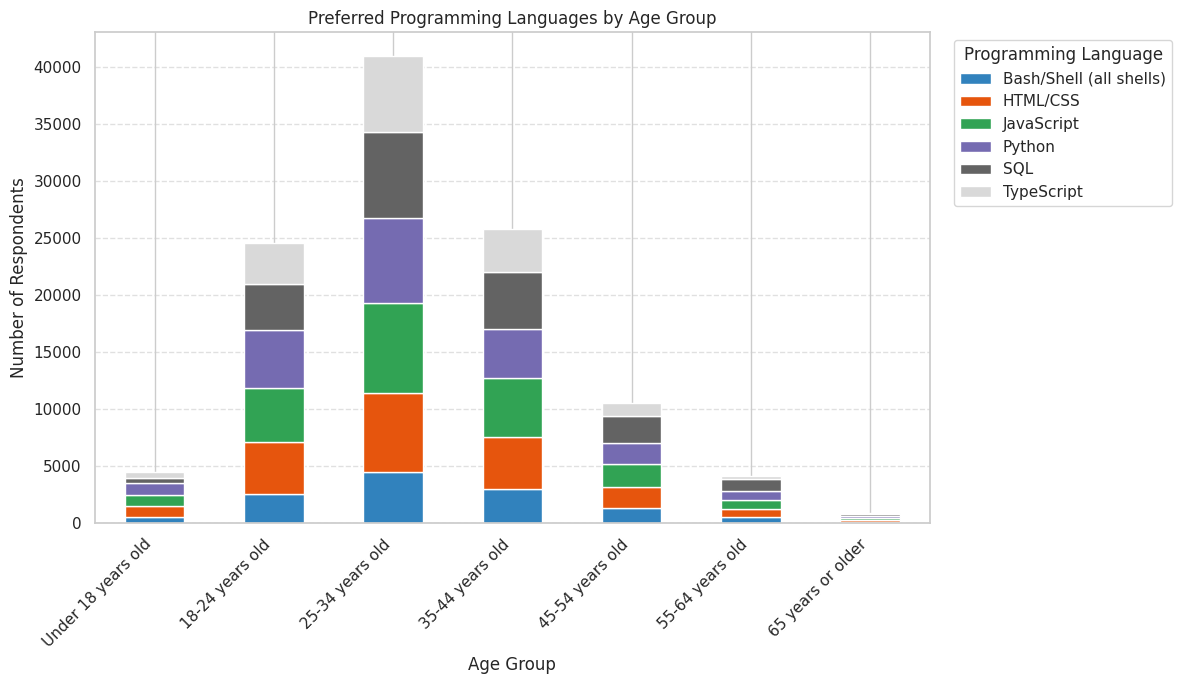

In [40]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1 : Nettoyer les données
df_clean = df.dropna(subset=['Age', 'LanguageAdmired'])

# Étape 2 : Exploser les valeurs séparées par point-virgule
df_exploded = df_clean.assign(LanguageList=df_clean['LanguageAdmired'].str.split(';')).explode('LanguageList')

# Étape 3 : Limiter aux langages les plus fréquents (top 6 pour la lisibilité)
top_languages = df_exploded['LanguageList'].value_counts().head(6).index
df_filtered = df_exploded[df_exploded['LanguageList'].isin(top_languages)].copy()
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Étape 4 : Regrouper les âges dans un ordre logique
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_filtered['Age'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Étape 5 : Créer une table croisée
pivot_table = pd.crosstab(df_filtered['Age'], df_filtered['LanguageList'])

# Étape 6 : Tracer le graphique empilé
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20c')

# Mise en forme
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Programming Language', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


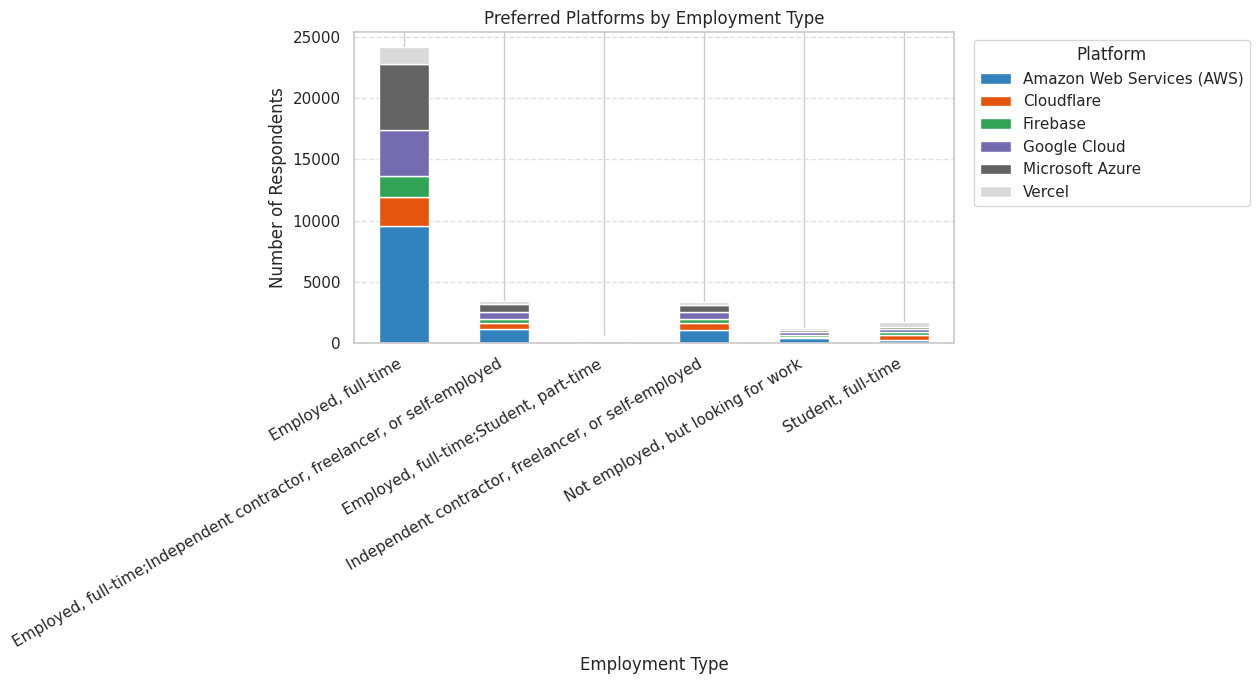

In [43]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Étape 1 : Nettoyer les données
df_clean = df.dropna(subset=['Employment', 'PlatformAdmired'])

# Étape 2 : Exploser les plateformes séparées par point-virgule
df_exploded = df_clean.assign(PlatformList=df_clean['PlatformAdmired'].str.split(';')).explode('PlatformList')

# Étape 3 : Limiter aux plateformes les plus fréquentes (top 6 pour la lisibilité)
top_platforms = df_exploded['PlatformList'].value_counts().head(6).index
df_filtered = df_exploded[df_exploded['PlatformList'].isin(top_platforms)].copy()

# Étape 4 : Garder les 6 types d'emploi les plus fréquents
top_employment = df_filtered['Employment'].value_counts().head(6).index
df_filtered = df_filtered[df_filtered['Employment'].isin(top_employment)]

# Étape 5 : Créer une table croisée
pivot_table = pd.crosstab(df_filtered['Employment'], df_filtered['PlatformList'])

# Étape 6 : Tracer le graphique empilé
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20c')

# Mise en forme
plt.title('Preferred Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
